##### Understand the goal of this lab (Answer some posted questions)
The reason for the riboswith called AND-1 is because that self-cleave only occured when presented
simultaneously with its two corresponding effector DNAs (DNA-7 and DNA-8).
The name of OR-1 indicates it is designed to trigger self-cleavage when either effector (DNA-9 or DNA-10) or both effectors are present.

The AND-1 riboswitch will cleave itself when both of its OBS are bound. 
The OR-1 riboswitch will not cleave itself when neither of its OBS are bound.
YES-1 undergoes self-cleavage, leads to the different comformation 

#### Get the sequences from the paper

YES_1 = GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

OBS: 26-47
Red regions: 16-21, 49-54

NOT_1=GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC

OBS: 44-66
Red regions: 40-43, 74-77

AND_1=GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU

OBS1: 30-45
OBS2: 49-64
Red regions: 16-23, 70-77

OR_1=GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACUAGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC

OBS1: 27-46
OBS2: 47-66
Red regions: 16-26, 67-77



In [12]:
import sqlite3
conn=sqlite3.connect('my.Database')
c=conn.cursor()
c.execute("""DROP TABLE DISPLAY""")
c.execute("""CREATE TABLE DISPLAY(name TEXT,
                                OBS_1 TEXT,
                                OBS_2 TEXT,
                                RED_region1 TEXT,
                                RED_region2 TEXT
                                );""")
c.execute("""INSERT INTO DISPLAY(name,
                              OBS_1,
                              OBS_2,
                              RED_region1,
                              RED_region2
                             )
                          VALUES('YES_1','26-47','','16-21','49-54'),
                          ('NOT_1','44-66','','40-43','74-77'),
                          ('AND_1','30-45','49-64','16-23','70-77'),
                          ('OR_1','27-46','47-66','16-26','67-77');""")
conn.commit()
c.execute('SELECT * FROM DISPLAY')
print(c.fetchall())

[('YES_1', '26-47', '', '16-21', '49-54'), ('NOT_1', '44-66', '', '40-43', '74-77'), ('AND_1', '30-45', '49-64', '16-23', '70-77'), ('OR_1', '27-46', '47-66', '16-26', '67-77')]


#### Write a routine to fold RNA on the terminal 
RNAfold //run RNAfold from a terminal 
Copy&paste all sequences
@ // tell RNAfold to finish
RNAplot //run RNAfold to get the figure
@ // tell RNAfold to finish


In [13]:
import subprocess
seqs= \
""">seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACUAGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
"""
p = subprocess.run(['RNAfold'],
                    input = bytes(seqs, 'ascii'),
                   stdout = subprocess.PIPE,   
                   stderr=subprocess.PIPE)    

print("***And this would have been in your output file***")
print(p.stdout.decode())


***And this would have been in your output file***
>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACUAGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.20)



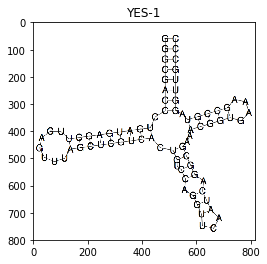

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("YES_1.png")
imgplot=plt.imshow(img)
plt.title('YES-1')
plt.show()

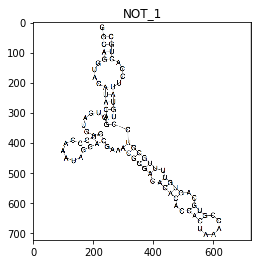

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("NOT_1.png")
imgplot=plt.imshow(img)
plt.title('NOT_1')
plt.show()

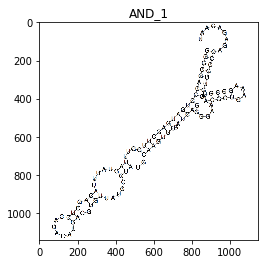

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("AND_1.png")
imgplot=plt.imshow(img)
plt.title('AND_1')
plt.show()

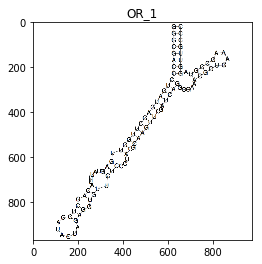

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("OR_1.png")
imgplot=plt.imshow(img)
plt.title('OR_1')
plt.show()


For YES-1, the red regions are not bound. Comparing with the YES-1 on the paper, we had an addition stem loop. The temperature used in both case (paper and default) are 37 degrees. One possible reason is that the author in publication had mentioned that this structure "has the potential to form several alternative secondary structures" that are thermodynamically less stable in their inactive state.

For NOT-1,the red regions are bound, producing that self-cleaving structure. The NOT-1 generated from the paper is similar to what I got. but the small stem loop was more obvious in my struture, while the small stem loop in the paper seems fused.

For AND-1, the red regions are not bound. Comparing with the publications, the folded structures are the same.

For OR-1, the red regions are not bound. Comparing with the publications, the folded structures are the same.



#### Stimulate the OBS biding in YES-1 and NOT-1
-generate files of constraints, in text files with sequences and another line indicating which position to be constrainted or not (. and x)

-Run the result of the textfile "RNAfold -C file.name" from the terminal 

For YES-1 and NOT-1 there is only two conditions: true= constraint, false= not constraint.
For AND-1 and OR-1 there would be four conditions in total: True,True= both OBS being constraint, True,False= only first site constraint, False,True= only second site constraint, False,False= none of the site constraint




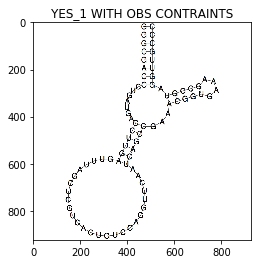

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("YES_1 WITH CONTRAINTS.png")
imgplot=plt.imshow(img)
plt.title('YES_1 WITH OBS CONTRAINTS')
plt.show()

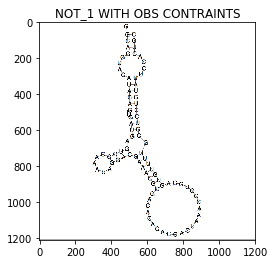

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("NOT_1 WITH CONTRAINTS.png")
imgplot=plt.imshow(img)
plt.title('NOT_1 WITH OBS CONTRAINTS')
plt.show()

For YES-1 constraint,red regions are paired up. It looks like the same self-cleaving structure as shown in the paper. For NOT-1 constraint,the red regions are not paired up. Thus it is turning off stage without self-cleave matches with the result of the paper. 

#### Simulating OBS binding for AND-1 and OR-1
One file will have OBS-1 x’d out, another will have OBS-2 x’d out, and the third will have both OBS-1 and OBS-2 x’d out.

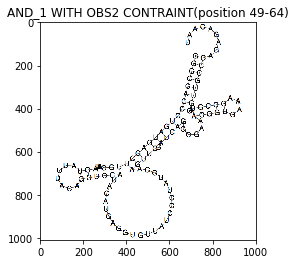

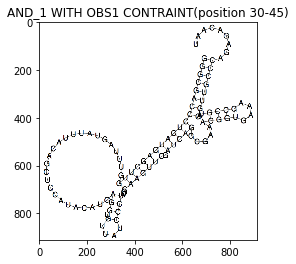

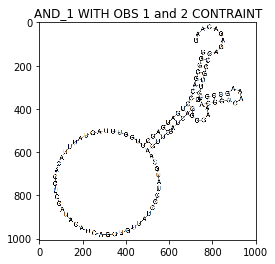

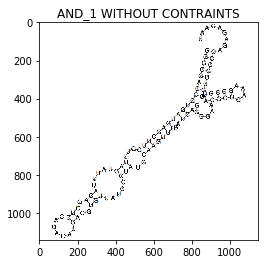

In [34]:
#AND-1_CONTRAINT2 (position 49-64)
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("AND_1 WITH CONTRAINT2.png")
imgplot=plt.imshow(img)
plt.title('AND_1 WITH OBS2 CONTRAINT(position 49-64)')
plt.show()
#AND-1_CONTRAINT1 (position 30-45)¶
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("AND_1 WITH CONTRAINT1.png")
imgplot=plt.imshow(img)
plt.title('AND_1 WITH OBS1 CONTRAINT(position 30-45)')
plt.show()
#AND-1_contraint1 and 2(position 30-45, 49-64)
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("AND_1 WITH CONTRAINT12.png")
imgplot=plt.imshow(img)
plt.title('AND_1 WITH OBS 1 and 2 CONTRAINT')
plt.show()
#AND_1 without contraints
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("AND_1.png")
imgplot=plt.imshow(img)
plt.title('AND_1 WITHOUT CONTRAINTS')
plt.show()

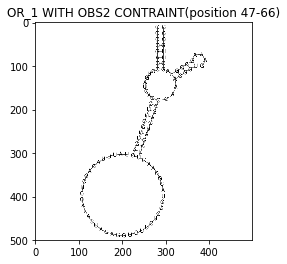

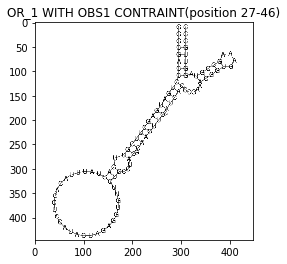

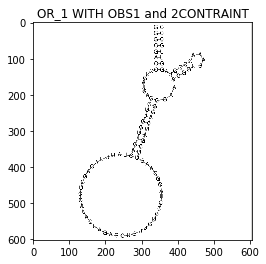

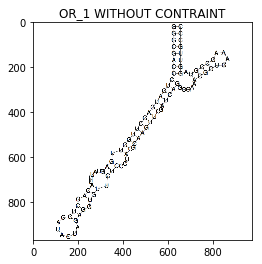

In [32]:
#OR-1_contraint 2(position 47-66)
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("OR_1 WITH CONTRAINT2.png")
imgplot=plt.imshow(img)
plt.title('OR_1 WITH OBS2 CONTRAINT(position 47-66)')
plt.show()
#OR-1_contraint 1(position 27-46)
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("OR_1 WITH CONTRAINT1.png")
imgplot=plt.imshow(img)
plt.title('OR_1 WITH OBS1 CONTRAINT(position 27-46)')
plt.show()
#OR-1_contraint 1(position 27-46, 47-66)
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("OR_1 WITH CONTRAINT12.png")
imgplot=plt.imshow(img)
plt.title('OR_1 WITH OBS1 and 2CONTRAINT')
plt.show()
# Neither position are binded
%matplotlib inline
import matplotlib.pyplot as plt     
import matplotlib.image as mpimg
img=mpimg.imread("OR_1.png")
imgplot=plt.imshow(img)
plt.title('OR_1 WITHOUT CONTRAINT')
plt.show()

In [27]:
print("***Determine whether the red regions pair with each other***\n")
print("            And         OR        ")
print("----------------------------------")
print("first OBS   False       True      ")

print("second OBS  False       True      ")

print("both OBS    True        True      ")

print('No binding  False       False')

***Determine whether the red regions pair with each other***

            And         OR        
----------------------------------
first OBS   False       True      
second OBS  False       True      
both OBS    True        True      
No binding  False       False


AND-1 only turns on when both OBS constraint are presented and so the red regions paired to each other. For OR-1, any one of OBS is constraint would result red regions to be paired. The results matches with the result from the paper.